# download stats

In [1]:
from rook.usage import Downloads
from datetime import datetime
import os
import pandas as pd
import time

In [2]:
d = Downloads()

In [3]:
d._http_log_path = "/Users/pingu/tmp/nginx/var/log/nginx"
d._http_log_path

'/Users/pingu/tmp/nginx/var/log/nginx'

In [4]:
d._output_path

'/outputs'

In [5]:
start = time.time()

d.collect(outdir=os.curdir)

duration = time.time() - start

print(f"duration: {duration} secs")

duration: 31.28702998161316 secs


In [6]:
df = pd.read_csv("downloads.csv")
df

,remote_host_ip,ip_number,datetime,timezone,request_type,request,protocol,status_code,size,referer,user_agent
0,136.156.155.149,2291964821,2024-08-14 00:13:10,200,GET,/outputs/rook/3769991e-59c1-11ef-b5c0-fa163e93...,HTTP/1.1,200,1984894,-,"Python-urllib/3.6"" ""-"
1,136.156.153.235,2291964395,2024-08-14 00:13:32,200,GET,/outputs/rook/46226da0-59c1-11ef-84a3-fa163e93...,HTTP/1.1,200,215882,-,"Python-urllib/3.6"" ""-"
2,136.156.153.87,2291964247,2024-08-14 00:13:44,200,GET,/outputs/rook/4ddbf048-59c1-11ef-989d-fa163e93...,HTTP/1.1,200,168461,-,"Python-urllib/3.6"" ""-"
3,136.156.153.87,2291964247,2024-08-14 00:14:03,200,GET,/outputs/rook/579ddfba-59c1-11ef-952a-fa163e93...,HTTP/1.1,200,2560814,-,"Python-urllib/3.6"" ""-"
4,136.156.154.193,2291964609,2024-08-14 00:14:33,200,GET,/outputs/rook/6a7586b0-59c1-11ef-80c3-fa163e93...,HTTP/1.1,200,154219,-,"Python-urllib/3.6"" ""-"
...,...,...,...,...,...,...,...,...,...,...,...
221072,136.156.155.149,2291964821,2024-08-13 22:23:46,200,GET,/outputs/rook/6a0d75ee-59b1-11ef-a3da-fa163e93...,HTTP/1.1,200,1833360810,-,"Python-urllib/3.6"" ""-"
221073,136.156.155.140,2291964812,2024-08-13 23:25:52,200,GET,/outputs/rook/9ce7a396-59ba-11ef-8c38-fa163e93...,HTTP/1.1,200,60959274,-,"Python-urllib/3.6"" ""-"
221074,136.156.155.140,2291964812,2024-08-13 23:38:35,200,GET,/outputs/rook/640bb8ee-59bc-11ef-b16c-fa163e93...,HTTP/1.1,200,347631,-,"Python-urllib/3.6"" ""-"
221075,136.156.153.235,2291964395,2024-08-13 23:43:14,200,GET,/outputs/rook/08a515bc-59bd-11ef-87ce-fa163e93...,HTTP/1.1,200,127257297,-,"Python-urllib/3.6"" ""-"


In [7]:
def classify(name):
    count = name.count("_")
    if count == 6:
        val = "cmip6"
    elif count == 5:
        val = "cmip6_fx"
    elif count == 4:
        val = "atlas"
    elif count > 6:
        val = "cordex"
    else:
        val = "other"
    return val

df["filename"] = df["request"].apply(lambda x: x.split('/')[-1])
df["collection"] = df["filename"].apply(lambda x: classify(x))
df["name"] = df["filename"].apply(lambda x: "_".join(x.split('_')[0:4]))
df["t"] = df["filename"].apply(lambda x: "_".join(x.split('_')[6:7]))
df["r"] = df["filename"].apply(lambda x: "_".join(x.split('_')[4:5]))
df["experiment"] = df["filename"].apply(lambda x: "_".join(x.split('_')[3:4]))
df["model"] = df["filename"].apply(lambda x: "_".join(x.split('_')[2:3]))
df["freq"] = df["filename"].apply(lambda x: "_".join(x.split('_')[1:2]))
df["var"] = df["filename"].apply(lambda x: "_".join(x.split('_')[0:1]))
df

,remote_host_ip,ip_number,datetime,timezone,request_type,request,protocol,status_code,size,referer,user_agent,filename,collection,name,t,r,experiment,model,freq,var
0,136.156.155.149,2291964821,2024-08-14 00:13:10,200,GET,/outputs/rook/3769991e-59c1-11ef-b5c0-fa163e93...,HTTP/1.1,200,1984894,-,"Python-urllib/3.6"" ""-",ta_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_20220816...,cmip6,ta_Amon_GFDL-ESM4_ssp585,20220816-20220816.nc,r1i1p1f1,ssp585,GFDL-ESM4,Amon,ta
1,136.156.153.235,2291964395,2024-08-14 00:13:32,200,GET,/outputs/rook/46226da0-59c1-11ef-84a3-fa163e93...,HTTP/1.1,200,215882,-,"Python-urllib/3.6"" ""-",uas_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_2022081...,cmip6,uas_Amon_GFDL-ESM4_ssp585,20220816-20220816.nc,r1i1p1f1,ssp585,GFDL-ESM4,Amon,uas
2,136.156.153.87,2291964247,2024-08-14 00:13:44,200,GET,/outputs/rook/4ddbf048-59c1-11ef-989d-fa163e93...,HTTP/1.1,200,168461,-,"Python-urllib/3.6"" ""-",tas_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_2022081...,cmip6,tas_Amon_GFDL-ESM4_ssp585,20220816-20220816.nc,r1i1p1f1,ssp585,GFDL-ESM4,Amon,tas
3,136.156.153.87,2291964247,2024-08-14 00:14:03,200,GET,/outputs/rook/579ddfba-59c1-11ef-952a-fa163e93...,HTTP/1.1,200,2560814,-,"Python-urllib/3.6"" ""-",hur_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_2022081...,cmip6,hur_Amon_GFDL-ESM4_ssp585,20220816-20220816.nc,r1i1p1f1,ssp585,GFDL-ESM4,Amon,hur
4,136.156.154.193,2291964609,2024-08-14 00:14:33,200,GET,/outputs/rook/6a7586b0-59c1-11ef-80c3-fa163e93...,HTTP/1.1,200,154219,-,"Python-urllib/3.6"" ""-",psl_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_2022081...,cmip6,psl_Amon_GFDL-ESM4_ssp585,20220816-20220816.nc,r1i1p1f1,ssp585,GFDL-ESM4,Amon,psl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221072,136.156.155.149,2291964821,2024-08-13 22:23:46,200,GET,/outputs/rook/6a0d75ee-59b1-11ef-a3da-fa163e93...,HTTP/1.1,200,1833360810,-,"Python-urllib/3.6"" ""-",pr_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_20150101-...,cmip6,pr_day_ACCESS-CM2_ssp245,20150101-20640705.nc,r1i1p1f1,ssp245,ACCESS-CM2,day,pr
221073,136.156.155.140,2291964812,2024-08-13 23:25:52,200,GET,/outputs/rook/9ce7a396-59ba-11ef-8c38-fa163e93...,HTTP/1.1,200,60959274,-,"Python-urllib/3.6"" ""-",pr_day_MIROC6_historical_r1i1p1f1_gn_19810101-...,cmip6,pr_day_MIROC6_historical,19810101-20101231.nc,r1i1p1f1,historical,MIROC6,day,pr
221074,136.156.155.140,2291964812,2024-08-13 23:38:35,200,GET,/outputs/rook/640bb8ee-59bc-11ef-b16c-fa163e93...,HTTP/1.1,200,347631,-,"Python-urllib/3.6"" ""-",tos_Omon_CanESM5-CanOE_ssp585_r1i1p2f1_gn_2050...,cmip6,tos_Omon_CanESM5-CanOE_ssp585,20500116-20991216.nc,r1i1p2f1,ssp585,CanESM5-CanOE,Omon,tos
221075,136.156.153.235,2291964395,2024-08-13 23:43:14,200,GET,/outputs/rook/08a515bc-59bd-11ef-87ce-fa163e93...,HTTP/1.1,200,127257297,-,"Python-urllib/3.6"" ""-",pr_day_NorESM2-MM_historical_r1i1p1f1_gn_19810...,cmip6,pr_day_NorESM2-MM_historical,19810101-20101231.nc,r1i1p1f1,historical,NorESM2-MM,day,pr


In [8]:
df["collection"].unique()

array(['cmip6', 'cmip6_fx', 'cordex', 'atlas'], dtype=object)

In [9]:
col_counts = df['collection'].value_counts().reset_index()
col_counts.columns = ['collection', 'count']
col_counts

,collection,count
0,cmip6,221016
1,cmip6_fx,44
2,atlas,13
3,cordex,4


In [10]:
df_atlas = df[df['collection'] == 'atlas']
df_atlas

,remote_host_ip,ip_number,datetime,timezone,request_type,request,protocol,status_code,size,referer,user_agent,filename,collection,name,t,r,experiment,model,freq,var
123871,136.156.139.146,2291960722,2024-08-01 16:35:35,200,GET,/outputs/rook/4f8d2838-5013-11ef-ac87-fa163e93...,HTTP/1.1,200,64586,-,"python-requests/2.32.3"" ""-",cdd_E-OBS_no-expt_yr_19500101-20210101.nc,atlas,cdd_E-OBS_no-expt_yr,,19500101-20210101.nc,yr,no-expt,E-OBS,cdd
123901,136.156.137.114,2291960178,2024-08-01 16:41:25,200,GET,/outputs/rook/2039b1ea-5014-11ef-ac55-fa163e93...,HTTP/1.1,200,965094,-,"python-requests/2.32.3"" ""-",t_E-OBS_no-expt_mon_19500101-20211201.nc,atlas,t_E-OBS_no-expt_mon,,19500101-20211201.nc,mon,no-expt,E-OBS,t
128575,136.156.138.207,2291960527,2024-08-02 16:55:15,200,GET,/outputs/rook/375fefc6-50df-11ef-9a31-fa163e93...,HTTP/1.1,200,665905,-,"python-requests/2.32.3"" ""-",rsds_E-OBS_no-expt_mon_19500101-20211201.nc,atlas,rsds_E-OBS_no-expt_mon,,19500101-20211201.nc,mon,no-expt,E-OBS,rsds
128576,136.156.140.238,2291961070,2024-08-02 16:58:53,200,GET,/outputs/rook/bb34e8f6-50df-11ef-b6b5-fa163e93...,HTTP/1.1,200,540626,-,"python-requests/2.32.3"" ""-",sfcwind_E-OBS_no-expt_mon_19500101-20211201.nc,atlas,sfcwind_E-OBS_no-expt_mon,,19500101-20211201.nc,mon,no-expt,E-OBS,sfcwind
128577,136.156.139.188,2291960764,2024-08-02 17:06:07,200,GET,/outputs/rook/bd85f07c-50e0-11ef-b422-fa163e93...,HTTP/1.1,200,965094,-,"python-requests/2.32.3"" ""-",t_E-OBS_no-expt_mon_19500101-20211201.nc,atlas,t_E-OBS_no-expt_mon,,19500101-20211201.nc,mon,no-expt,E-OBS,t
128578,136.156.138.149,2291960469,2024-08-02 17:07:12,200,GET,/outputs/rook/e4c15fd2-50e0-11ef-aa72-fa163e93...,HTTP/1.1,200,102286,-,"python-requests/2.32.3"" ""-",tx35_E-OBS_no-expt_mon_19500101-20211201.nc,atlas,tx35_E-OBS_no-expt_mon,,19500101-20211201.nc,mon,no-expt,E-OBS,tx35
128579,136.156.139.146,2291960722,2024-08-02 17:10:29,200,GET,/outputs/rook/59e4e4b4-50e1-11ef-8859-fa163e93...,HTTP/1.1,200,957903,-,"python-requests/2.32.3"" ""-",txx_E-OBS_no-expt_mon_19500101-20211201.nc,atlas,txx_E-OBS_no-expt_mon,,19500101-20211201.nc,mon,no-expt,E-OBS,txx
128581,136.156.138.199,2291960519,2024-08-02 17:17:34,200,GET,/outputs/rook/575dd3bc-50e2-11ef-8ef3-fa163e93...,HTTP/1.1,200,912057,-,"python-requests/2.32.3"" ""-",pr_E-OBS_no-expt_mon_19500101-20211201.nc,atlas,pr_E-OBS_no-expt_mon,,19500101-20211201.nc,mon,no-expt,E-OBS,pr
128582,136.156.140.220,2291961052,2024-08-02 17:18:32,200,GET,/outputs/rook/79bd31aa-50e2-11ef-b6bd-fa163e93...,HTTP/1.1,200,64586,-,"python-requests/2.32.3"" ""-",cdd_E-OBS_no-expt_yr_19500101-20210101.nc,atlas,cdd_E-OBS_no-expt_yr,,19500101-20210101.nc,yr,no-expt,E-OBS,cdd
128583,136.156.140.238,2291961070,2024-08-02 17:19:29,200,GET,/outputs/rook/9c00f0d0-50e2-11ef-b64b-fa163e93...,HTTP/1.1,200,963043,-,"python-requests/2.32.3"" ""-",tn_E-OBS_no-expt_mon_19500101-20211201.nc,atlas,tn_E-OBS_no-expt_mon,,19500101-20211201.nc,mon,no-expt,E-OBS,tn


In [11]:
df = df[df['collection'] == 'cmip6']
df

,remote_host_ip,ip_number,datetime,timezone,request_type,request,protocol,status_code,size,referer,user_agent,filename,collection,name,t,r,experiment,model,freq,var
0,136.156.155.149,2291964821,2024-08-14 00:13:10,200,GET,/outputs/rook/3769991e-59c1-11ef-b5c0-fa163e93...,HTTP/1.1,200,1984894,-,"Python-urllib/3.6"" ""-",ta_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_20220816...,cmip6,ta_Amon_GFDL-ESM4_ssp585,20220816-20220816.nc,r1i1p1f1,ssp585,GFDL-ESM4,Amon,ta
1,136.156.153.235,2291964395,2024-08-14 00:13:32,200,GET,/outputs/rook/46226da0-59c1-11ef-84a3-fa163e93...,HTTP/1.1,200,215882,-,"Python-urllib/3.6"" ""-",uas_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_2022081...,cmip6,uas_Amon_GFDL-ESM4_ssp585,20220816-20220816.nc,r1i1p1f1,ssp585,GFDL-ESM4,Amon,uas
2,136.156.153.87,2291964247,2024-08-14 00:13:44,200,GET,/outputs/rook/4ddbf048-59c1-11ef-989d-fa163e93...,HTTP/1.1,200,168461,-,"Python-urllib/3.6"" ""-",tas_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_2022081...,cmip6,tas_Amon_GFDL-ESM4_ssp585,20220816-20220816.nc,r1i1p1f1,ssp585,GFDL-ESM4,Amon,tas
3,136.156.153.87,2291964247,2024-08-14 00:14:03,200,GET,/outputs/rook/579ddfba-59c1-11ef-952a-fa163e93...,HTTP/1.1,200,2560814,-,"Python-urllib/3.6"" ""-",hur_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_2022081...,cmip6,hur_Amon_GFDL-ESM4_ssp585,20220816-20220816.nc,r1i1p1f1,ssp585,GFDL-ESM4,Amon,hur
4,136.156.154.193,2291964609,2024-08-14 00:14:33,200,GET,/outputs/rook/6a7586b0-59c1-11ef-80c3-fa163e93...,HTTP/1.1,200,154219,-,"Python-urllib/3.6"" ""-",psl_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_2022081...,cmip6,psl_Amon_GFDL-ESM4_ssp585,20220816-20220816.nc,r1i1p1f1,ssp585,GFDL-ESM4,Amon,psl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221072,136.156.155.149,2291964821,2024-08-13 22:23:46,200,GET,/outputs/rook/6a0d75ee-59b1-11ef-a3da-fa163e93...,HTTP/1.1,200,1833360810,-,"Python-urllib/3.6"" ""-",pr_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_20150101-...,cmip6,pr_day_ACCESS-CM2_ssp245,20150101-20640705.nc,r1i1p1f1,ssp245,ACCESS-CM2,day,pr
221073,136.156.155.140,2291964812,2024-08-13 23:25:52,200,GET,/outputs/rook/9ce7a396-59ba-11ef-8c38-fa163e93...,HTTP/1.1,200,60959274,-,"Python-urllib/3.6"" ""-",pr_day_MIROC6_historical_r1i1p1f1_gn_19810101-...,cmip6,pr_day_MIROC6_historical,19810101-20101231.nc,r1i1p1f1,historical,MIROC6,day,pr
221074,136.156.155.140,2291964812,2024-08-13 23:38:35,200,GET,/outputs/rook/640bb8ee-59bc-11ef-b16c-fa163e93...,HTTP/1.1,200,347631,-,"Python-urllib/3.6"" ""-",tos_Omon_CanESM5-CanOE_ssp585_r1i1p2f1_gn_2050...,cmip6,tos_Omon_CanESM5-CanOE_ssp585,20500116-20991216.nc,r1i1p2f1,ssp585,CanESM5-CanOE,Omon,tos
221075,136.156.153.235,2291964395,2024-08-13 23:43:14,200,GET,/outputs/rook/08a515bc-59bd-11ef-87ce-fa163e93...,HTTP/1.1,200,127257297,-,"Python-urllib/3.6"" ""-",pr_day_NorESM2-MM_historical_r1i1p1f1_gn_19810...,cmip6,pr_day_NorESM2-MM_historical,19810101-20101231.nc,r1i1p1f1,historical,NorESM2-MM,day,pr


In [12]:
df["remote_host_ip"].unique()

array(['136.156.155.149', '136.156.153.235', '136.156.153.87',
       '136.156.154.193', '136.156.155.140', '136.156.152.196',
       '136.156.153.89', '136.156.153.31', '136.156.155.122',
       '136.156.152.141', '136.156.152.147', '136.156.152.91',
       '136.156.140.74', '136.156.153.251', '136.156.152.6',
       '136.156.136.226', '136.156.136.176', '136.156.137.214',
       '136.156.138.214', '136.156.153.33', '136.156.137.155',
       '136.156.139.60', '136.156.155.119', '136.156.138.199',
       '136.156.139.223', '136.156.140.91', '136.156.137.122',
       '136.156.138.149', '136.156.139.106', '136.156.155.89',
       '136.156.152.219', '136.156.153.93', '136.156.154.199',
       '136.156.138.193', '136.172.60.11', '136.156.139.188',
       '136.156.138.53', '136.172.8.35', '136.156.133.105',
       '136.156.132.41', '136.156.139.146', '136.156.140.167',
       '136.156.139.101', '136.156.137.62', '136.156.137.114',
       '136.156.137.247', '136.156.140.238', '136.156.138.20

In [13]:
ip_counts = df['remote_host_ip'].value_counts().reset_index()
ip_counts.columns = ['ip', 'count']
ip_counts

,ip,count
0,136.156.152.196,11136
1,136.156.153.89,11063
2,136.156.153.235,11013
3,136.156.155.140,10952
4,136.156.153.93,10929
5,136.156.152.219,10889
6,136.156.152.141,10862
7,136.156.154.193,10851
8,136.156.154.199,10821
9,136.156.152.91,10767


In [14]:
df["status_code"].unique()

array([200])

In [15]:
df["user_agent"].unique()

array(['Python-urllib/3.6" "-', 'python-requests/2.32.3" "-',
       'python-requests/2.31.0" "-',
       'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36" "-'],
      dtype=object)

In [16]:
agent_counts = df['user_agent'].value_counts().reset_index()
agent_counts.columns = ['user_agent', 'count']
agent_counts

,user_agent,count
0,"Python-urllib/3.6"" ""-",214726
1,"python-requests/2.32.3"" ""-",6282
2,"python-requests/2.31.0"" ""-",7
3,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1


In [17]:
df["size"].unique()

array([1984894,  215882,  168461, ...,  121306,  523432,  347631])

In [18]:
size_counts = df['size'].value_counts().reset_index()
size_counts.columns = ['size', 'count']
size_counts

,size,count
0,46313,1498
1,60707,1465
2,59543,1427
3,45111,1406
4,45242,1230
...,...,...
94576,1061288,1
94577,1061453,1
94578,1059414,1
94579,1062793,1


In [19]:
df["filename"].unique()

array(['ta_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_20220816-20220816.nc',
       'uas_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_20220816-20220816.nc',
       'tas_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_20220816-20220816.nc', ...,
       'tas_Amon_MPI-ESM1-2-LR_ssp370_r1i1p1f1_gn_20200116-21001216.nc',
       'tas_Amon_MPI-ESM1-2-LR_ssp585_r1i1p1f1_gn_20200116-21001216.nc',
       'tos_Omon_CanESM5-CanOE_ssp585_r1i1p2f1_gn_20500116-20991216.nc'],
      dtype=object)

In [20]:
df["name"].unique()

array(['ta_Amon_GFDL-ESM4_ssp585', 'uas_Amon_GFDL-ESM4_ssp585',
       'tas_Amon_GFDL-ESM4_ssp585', ..., 'vas_Amon_MPI-ESM1-2-LR_ssp585',
       'uas_Amon_MPI-ESM1-2-LR_ssp245', 'uas_Amon_MPI-ESM1-2-LR_ssp585'],
      dtype=object)

In [21]:
df["r"].unique()

array(['r1i1p1f1', 'r1i1p1f2', 'r1i1p2f1', 'r4i1p1f1', 'r1i1p1f3',
       'r2i1p1f1', 'r101i1p1f1', 'r13i1p1f2', 'r14i1p1f2', 'r10i1p1f1',
       'r1i1p4f2', 'r1i1p5f2', 'r0i0p0f2', 'r5i1p1f1', 'r3i1p1f1',
       'r10i1p1f2', 'r2i1p1f2'], dtype=object)

In [22]:
df["t"].unique()

array(['20220816-20220816.nc', '20230116-20231216.nc',
       '18500116-20141216.nc', ..., '20150101-20551230.nc',
       '19600116-19901216.nc', '20150116-20481216.nc'], dtype=object)

In [23]:
df["experiment"].unique()

array(['ssp585', 'ssp126', 'historical', 'ssp370', 'ssp119', 'ssp245',
       'ssp434', 'dcppA-hindcast', 'dcppB-forecast', 'ssp460',
       'ssp534-over'], dtype=object)

In [24]:
df["model"].unique()

array(['GFDL-ESM4', 'CNRM-CM6-1-HR', 'CanESM5', 'CMCC-ESM2', 'FGOALS-g3',
       'MPI-ESM1-2-LR', 'INM-CM4-8', 'ACCESS-CM2', 'AWI-CM-1-1-MR',
       'BCC-CSM2-MR', 'CAMS-CSM1-0', 'CanESM5-CanOE', 'EC-Earth3-AerChem',
       'INM-CM5-0', 'IPSL-CM6A-LR', 'MIROC6', 'MIROC-ES2L', 'FGOALS-f3-L',
       'NorESM2-MM', 'TaiESM1', 'CESM2-WACCM', 'CESM2', 'CMCC-CM2-SR5',
       'EC-Earth3-Veg', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'EC-Earth3-Veg-LR',
       'IPSL-CM5A2-INCA', 'KACE-1-0-G', 'MCM-UA-1-0', 'UKESM1-0-LL',
       'NorESM2-LM', 'EC-Earth3-CC', 'FIO-ESM-2-0', 'NESM3',
       'ACCESS-ESM1-5', 'MRI-ESM2-0', 'EC-Earth3', 'CMCC-CM2-HR4',
       'HadGEM3-GC31-MM', 'AWI-ESM-1-1-LR', 'HadGEM3-GC31-LL', 'IITM-ESM',
       'KIOST-ESM', 'MPI-ESM-1-2-HAM', 'E3SM-1-1', 'CIESM', 'CESM2-FV2',
       'MPI-ESM1-2-HR', 'CESM2-WACCM-FV2', 'E3SM-1-0', 'E3SM-1-1-ECA',
       'NorCPM1', 'BCC-ESM1', 'MIROC-ES2H', 'SAM0-UNICON', 'GISS-E2-1-G',
       'GISS-E2-1-H'], dtype=object)

In [25]:
df["var"].unique()

array(['ta', 'uas', 'tas', 'hur', 'psl', 'hus', 'huss', 'ts', 'ua', 'zg',
       'mrsos', 'sfcWind', 'va', 'ps', 'clt', 'pr', 'zos', 'hurs', 'mrro',
       'tasmax', 'tasmin', 'evspsbl', 'rlut', 'rlds', 'rsds', 'tos',
       'vas', 'sos', 'prsn', 'rsdt', 'snd', 'snw', 'siconc', 'rlus',
       'rsus', 'sithick', 'hfls', 'hfss', 'zg500', 'simass', 'rsut',
       'tauu', 'tauv', 'area'], dtype=object)

In [26]:
df["freq"].unique()

array(['Amon', 'Lmon', 'Omon', 'day', 'LImon', 'SImon', 'AERday'],
      dtype=object)

In [27]:
name_counts = df['name'].value_counts().reset_index()
name_counts.columns = ['name', 'count']
name_counts

,name,count
0,pr_Amon_UKESM1-0-LL_ssp245,2110
1,pr_day_UKESM1-0-LL_ssp245,1338
2,pr_day_GFDL-ESM4_ssp585,1294
3,pr_day_ACCESS-CM2_ssp585,1260
4,pr_day_INM-CM5-0_ssp585,1208
...,...,...
4990,tasmax_Amon_INM-CM4-8_ssp370,1
4991,vas_Amon_CNRM-CM6-1_ssp245,1
4992,vas_Amon_CNRM-ESM2-1_ssp245,1
4993,psl_Amon_CNRM-ESM2-1_ssp434,1


In [28]:
name_counts.head(10)

,name,count
0,pr_Amon_UKESM1-0-LL_ssp245,2110
1,pr_day_UKESM1-0-LL_ssp245,1338
2,pr_day_GFDL-ESM4_ssp585,1294
3,pr_day_ACCESS-CM2_ssp585,1260
4,pr_day_INM-CM5-0_ssp585,1208
5,pr_day_AWI-CM-1-1-MR_ssp585,1189
6,pr_day_EC-Earth3-Veg-LR_ssp585,1189
7,pr_day_MIROC6_ssp585,1164
8,pr_day_MRI-ESM2-0_ssp585,1133
9,pr_day_CESM2_ssp585,1124


<Axes: >

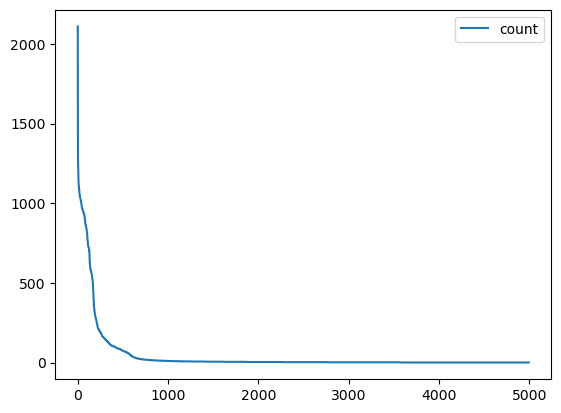

In [29]:
name_counts.plot()

In [30]:
r_counts = df['r'].value_counts().reset_index()
r_counts.columns = ['r', 'count']
r_counts

,r,count
0,r1i1p1f1,159146
1,r1i1p1f2,38640
2,r4i1p1f1,7504
3,r1i1p1f3,6851
4,r2i1p1f1,3807
5,r1i1p2f1,2453
6,r13i1p1f2,2061
7,r14i1p1f2,252
8,r10i1p1f1,127
9,r101i1p1f1,90


In [31]:
r_counts.head(5)

,r,count
0,r1i1p1f1,159146
1,r1i1p1f2,38640
2,r4i1p1f1,7504
3,r1i1p1f3,6851
4,r2i1p1f1,3807


<Axes: >

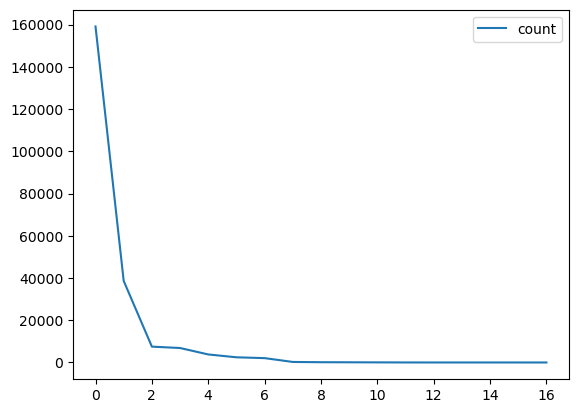

In [32]:
r_counts.plot()

In [33]:
t_counts = df['t'].value_counts().reset_index()
t_counts.columns = ['t', 'count']
t_counts

,t,count
0,20150116-21001216.nc,3571
1,20150101-21001231.nc,3270
2,20150101-20991231.nc,1566
3,20200101-20601231.nc,1557
4,18500116-20141216.nc,1392
...,...,...
7254,18500116-18920916.nc,1
7255,18500116-19510616.nc,1
7256,20281115-20281115.nc,1
7257,20140117-20140717.nc,1


In [34]:
t_counts.head(10)

,t,count
0,20150116-21001216.nc,3571
1,20150101-21001231.nc,3270
2,20150101-20991231.nc,1566
3,20200101-20601231.nc,1557
4,18500116-20141216.nc,1392
5,20300101-20301231.nc,1363
6,20500101-20501231.nc,1249
7,20250101-20251231.nc,1222
8,20150116-20991216.nc,971
9,21000101-21001231.nc,945


<Axes: >

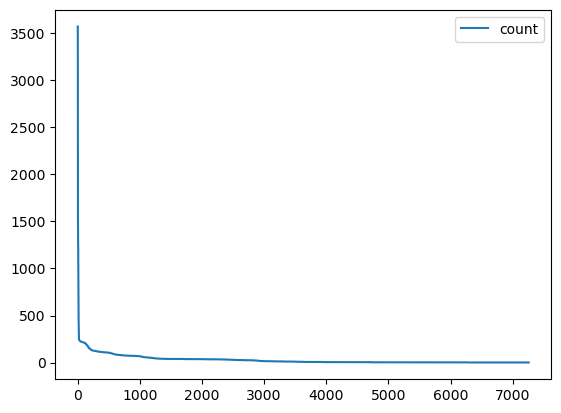

In [35]:
t_counts.plot()

In [36]:
exp_counts = df['experiment'].value_counts().reset_index()
exp_counts.columns = ['experiment', 'count']
exp_counts

,experiment,count
0,ssp585,70566
1,ssp245,46204
2,historical,35541
3,ssp370,34477
4,ssp126,31618
5,ssp119,1951
6,ssp460,263
7,ssp434,234
8,dcppA-hindcast,132
9,ssp534-over,22


In [37]:
exp_counts.head(7)

,experiment,count
0,ssp585,70566
1,ssp245,46204
2,historical,35541
3,ssp370,34477
4,ssp126,31618
5,ssp119,1951
6,ssp460,263


<Axes: >

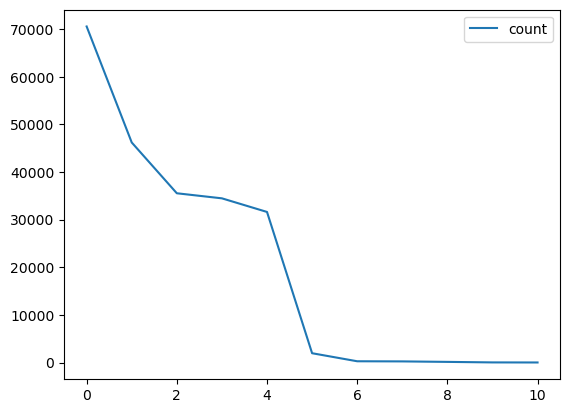

In [38]:
exp_counts.plot()

In [39]:
model_counts = df['model'].value_counts().reset_index()
model_counts.columns = ['model', 'count']
model_counts

,model,count
0,MPI-ESM1-2-LR,11488
1,ACCESS-CM2,10331
2,CNRM-ESM2-1,9546
3,MIROC-ES2L,9479
4,MRI-ESM2-0,9421
5,GFDL-ESM4,9174
6,UKESM1-0-LL,9024
7,MIROC6,8766
8,CESM2,8493
9,NorESM2-MM,8130


In [40]:
model_counts.head(40)

,model,count
0,MPI-ESM1-2-LR,11488
1,ACCESS-CM2,10331
2,CNRM-ESM2-1,9546
3,MIROC-ES2L,9479
4,MRI-ESM2-0,9421
5,GFDL-ESM4,9174
6,UKESM1-0-LL,9024
7,MIROC6,8766
8,CESM2,8493
9,NorESM2-MM,8130


<Axes: >

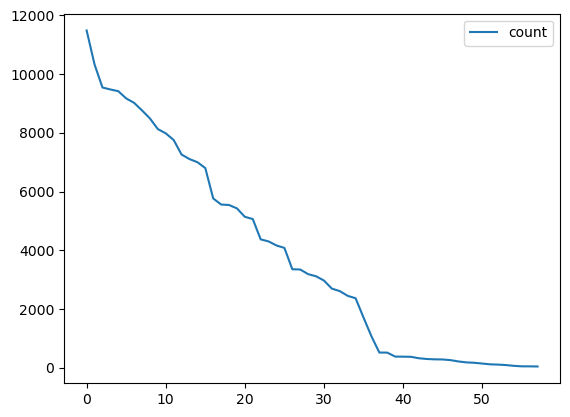

In [41]:
model_counts.plot()

In [42]:
var_counts = df['var'].value_counts().reset_index()
var_counts.columns = ['var', 'count']
var_counts

,var,count
0,pr,155025
1,tas,16667
2,tasmax,15014
3,tasmin,8276
4,huss,5469
5,sfcWind,5129
6,ta,4362
7,psl,2978
8,rsds,1545
9,zg,862


In [43]:
var_counts.head(10)

,var,count
0,pr,155025
1,tas,16667
2,tasmax,15014
3,tasmin,8276
4,huss,5469
5,sfcWind,5129
6,ta,4362
7,psl,2978
8,rsds,1545
9,zg,862


<Axes: >

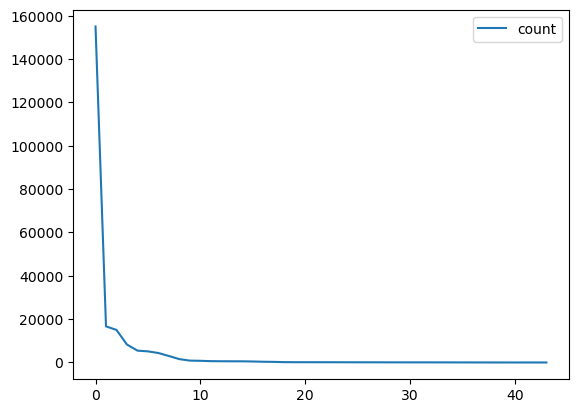

In [44]:
var_counts.plot()

In [45]:
freq_counts = df['freq'].value_counts().reset_index()
freq_counts.columns = ['freq', 'count']
freq_counts

,freq,count
0,day,158417
1,Amon,60992
2,Omon,944
3,Lmon,502
4,SImon,91
5,LImon,65
6,AERday,5


<Axes: >

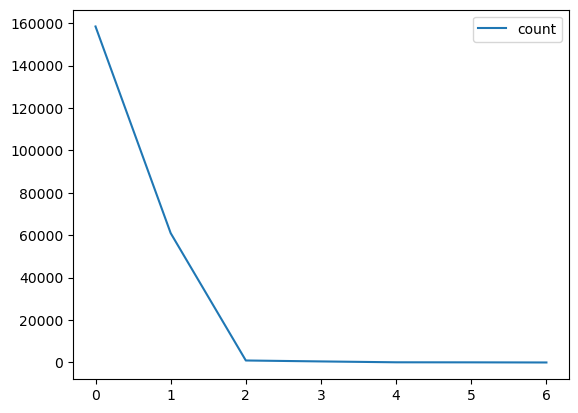

In [46]:
freq_counts.plot()